In [90]:
# TensorFlow and tf.keras
import tensorflow as tf
import random as random
from random import sample

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [91]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [92]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [93]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)


10000

In [94]:
train_images = train_images / 255.0

test_images = test_images / 255.0

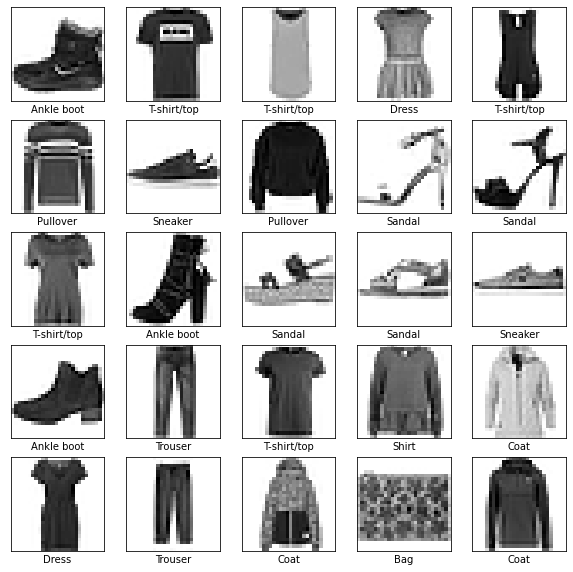

In [95]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [96]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [98]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4942 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3753 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3376 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3127 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2800 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [99]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3456 - accuracy: 0.8793 - 482ms/epoch - 2ms/step

Test accuracy: 0.8792999982833862


In [100]:
true_weights = model.layers[1].get_weights()

def one_hundered_classifiers(weights, p):
  hundered_classifiers_predictions =[]
  precent = p/100
  number_of_nodes_to_drop = round(len(weights[1]) * precent)
  for i in range (100):
    randomized_weights = weights
    the_nodes_to_drop = np.random.choice(128, number_of_nodes_to_drop)
    for i in range (len(randomized_weights[1])):
      if i in the_nodes_to_drop:
        randomized_weights[0][i] *= 0               # setting p weights to 0
      else:
        randomized_weights[0][i]/= (1-precent)      # updating other weights
    model.layers[1].set_weights(randomized_weights) 
    probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    hundered_classifiers_predictions.append(predictions)
  return np.array(hundered_classifiers_predictions)

# this is an array of 100 predictions         
one_hundered_predictions = one_hundered_classifiers(true_weights, 20)       # here you can update the precentage of dropout. 20 mean 20%

#model.layers[1].set_weights(updated_weights)   


In [101]:
print(len(one_hundered_predictions[0]))

one_hundered_predictions_for_test = one_hundered_predictions



10000


In [102]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6397 - accuracy: 0.7881 - 389ms/epoch - 1ms/step

Test accuracy: 0.788100004196167


In [103]:
# here is a calculation of average of 100 arrays of prediction
avg_of_all_predictions = []
sum_pred = 0
avg = np.array(avg_of_all_predictions)
for predict in one_hundered_predictions_for_test:
 sum_pred += predict
avg_pred = sum_pred/len(one_hundered_predictions_for_test)
print(len(sum_pred))

10000


In [104]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

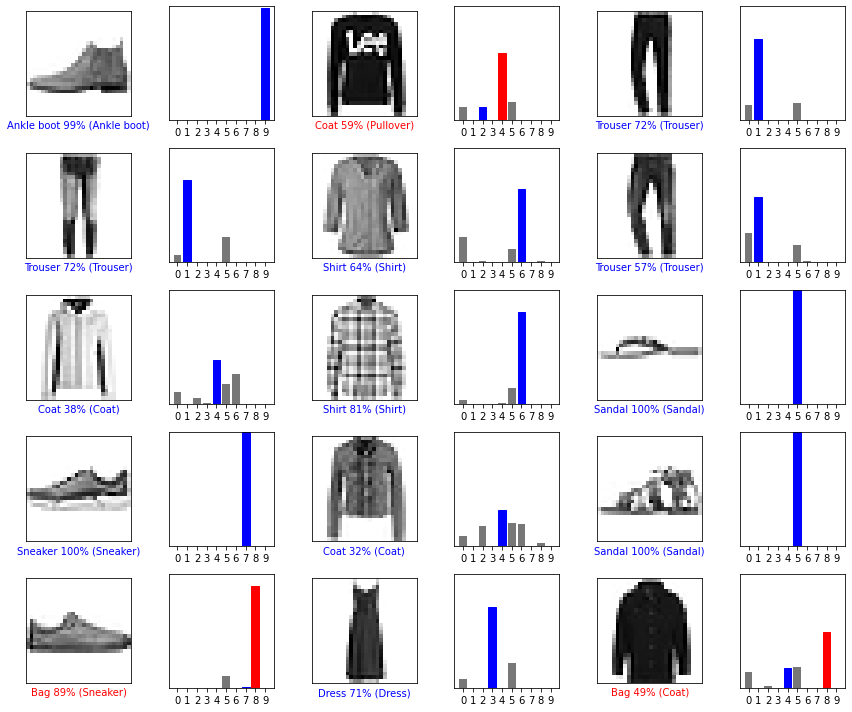

In [105]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, avg_pred[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, avg_pred[i], test_labels)
plt.tight_layout()
plt.show()

10000
7947
2053
[0.98925555, 0.7183422, 0.72080886, 0.6429455, 0.57214564, 0.38304555, 0.8097521, 0.99986327, 0.9999471, 0.3166564, 0.9999617, 0.7069357, 0.7057111, 0.99999774, 0.7202781, 0.35747477, 0.9763241, 0.9994425, 0.7316401, 0.8202093, 0.99135584, 0.36427322, 0.8040956, 0.6594691, 0.74966997, 0.6437294, 0.9203676, 0.7194223, 0.9980392, 0.9993643, 0.9998602, 0.9992466, 0.72093004, 0.8685987, 0.24666269, 0.8970339, 0.49229264, 0.9981743, 0.6370241, 0.99999994, 0.99999774, 0.74197763, 0.99629164, 0.99091154, 0.8761095, 0.99988616, 0.72436607, 0.69068086, 0.6200261, 0.9998676, 0.9816132, 0.73989695, 0.60931236, 0.74212044, 0.6879632, 0.75456345, 0.6375872, 0.6670414, 0.9870633, 0.9999981, 0.9999544, 0.9999998, 0.8719698, 0.66753054, 0.8715499, 0.9999998, 0.53889644, 0.39377025, 0.99988604, 0.72573775, 0.99982256, 0.503203, 0.6401533, 0.6770937, 0.43149406, 0.9984514, 0.9993821, 0.8451295, 0.99999803, 0.75447905, 0.9355234, 0.4380571, 0.43410447, 0.9999776, 0.99987787, 0.7111321, 0.

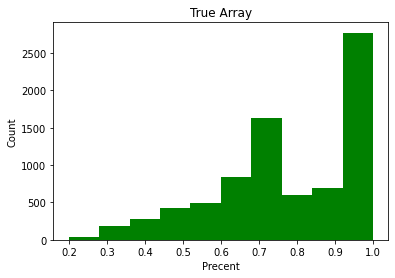

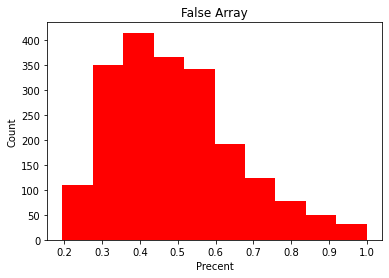

In [106]:
count=0
counterT=0
counterF=0
trueArray=[]
FalseArray=[]
for i in range(0,10000) :
  count=count+1
  predicted_label = np.argmax(avg_pred[i])
  test_label=(test_labels[i])
  if(predicted_label==test_label):
    trueArray.append(np.max(avg_pred[i]))
    counterT=counterT+1
  else:
    FalseArray.append(np.max(avg_pred[i]))
    counterF=counterF+1

print(count)
print(counterT)
print(counterF)
print(trueArray)
plt.hist(trueArray , color ="green")
plt.xlabel('Precent')
plt.ylabel('Count')
# displaying the title
plt.title("True Array")
plt.show()
plt.hist(FalseArray , color ="red")
plt.xlabel('Precent')
plt.ylabel('Count')
# displaying the title
plt.title("False Array")
plt.show()